**IMPORTING LIBRAIES**

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
df = pd.read_csv('/content/CAPSTONE DATASET.zip')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


**EXPLORATORY DATA ANALYSIS**

In [ ]:
df.shape

(1319, 9)

In [ ]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


**DATASETOVERVIEW**

We have 1319 rows and 9 columns.
There are no null values in the dataset.
We will need to one hot encode the gender variable.
We will need to convert values in the class column to 0 and 1.
We will also need to deal with some obvious outliers probably caused by human error.

**AGE**

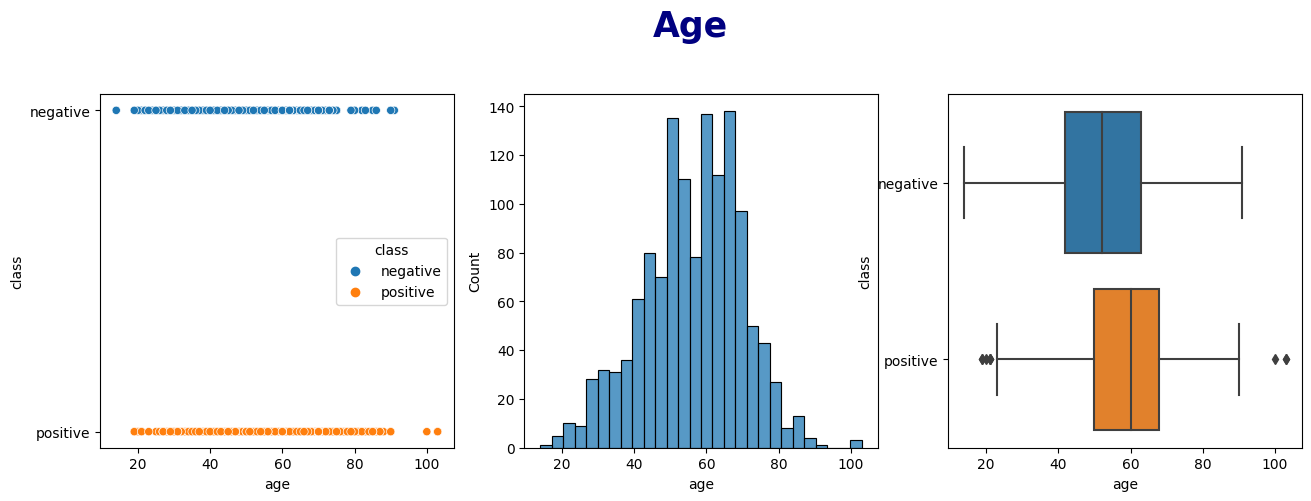

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Age', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)
# ax1
sns.scatterplot(data=df, x='age', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='age', ax=axes[1])

# ax3
sns.boxplot(data=df, x='age', y='class', ax=axes[2])

plt.show()

**GENDER**

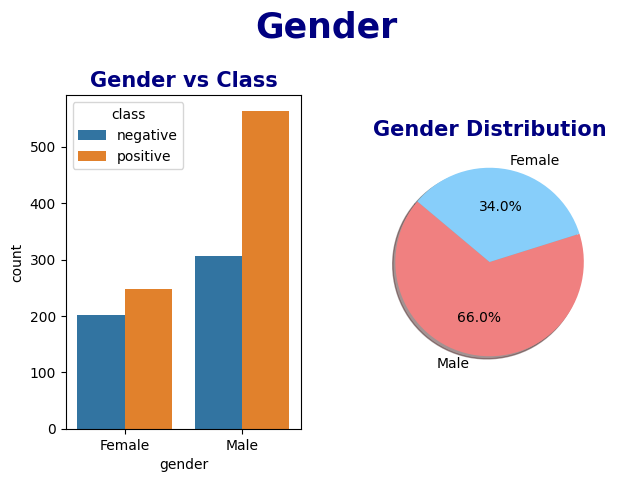

In [ ]:
# Create subplots
fig, axes = plt.subplots(1, 2)
plt.suptitle('Gender', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1: Countplot
sns.countplot(data=df, x='gender', ax=axes[0], hue='class')
axes[0].set_title('Gender vs Class', fontsize=15,
                  fontweight='bold', color='navy')
axes[0].set_xticklabels(['Female', 'Male'], )

# ax2: Pie Chart
gender_counts = df['gender'].value_counts()
labels = ['Male', 'Female']
sizes = gender_counts.values
colors = ['lightcoral', 'lightskyblue']  # Colors for the pie slices

axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
axes[1].set_title('Gender Distribution', fontsize=15,
                  fontweight='bold', color='navy')

plt.show()

**IMPULSE**

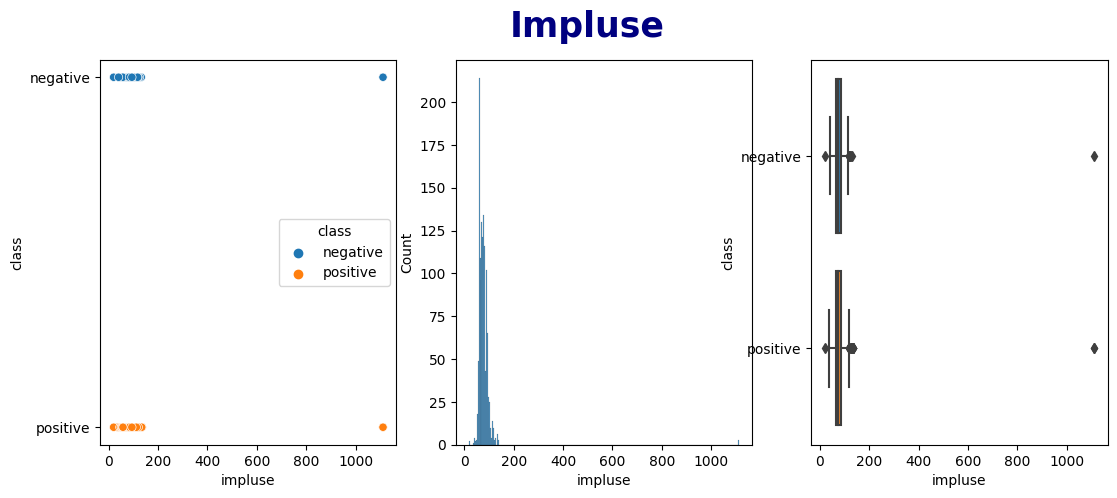

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Impluse', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=df, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=df, x='impluse', y='class', ax=axes[2])

plt.show()

In [ ]:
df[df.impluse > 1000]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


In [ ]:
condition = df.impluse < 1000
df = df[condition]

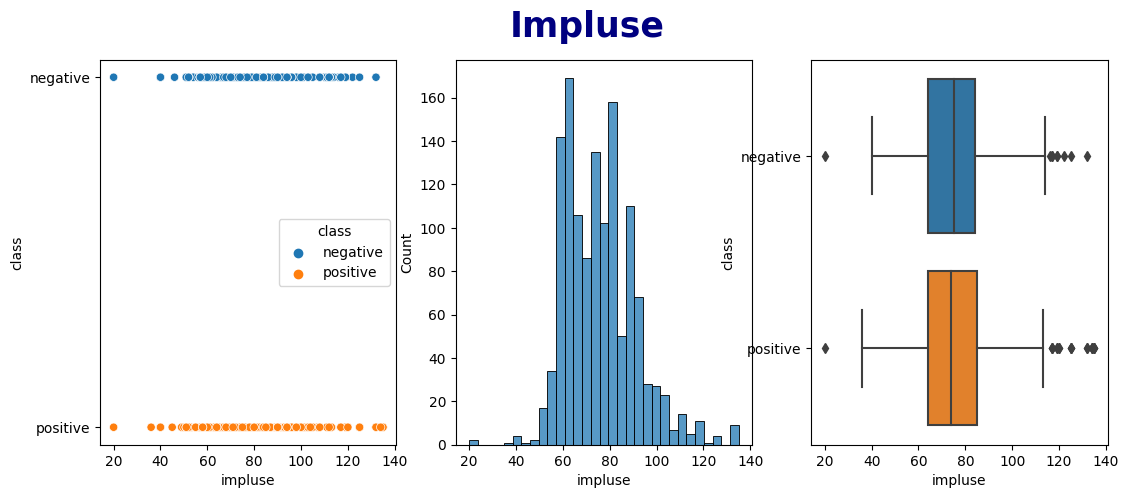

In [ ]:
# Col3 : impluse
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Impluse', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=df, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=df, x='impluse', y='class', ax=axes[2])

plt.show()

**HIGH BP**

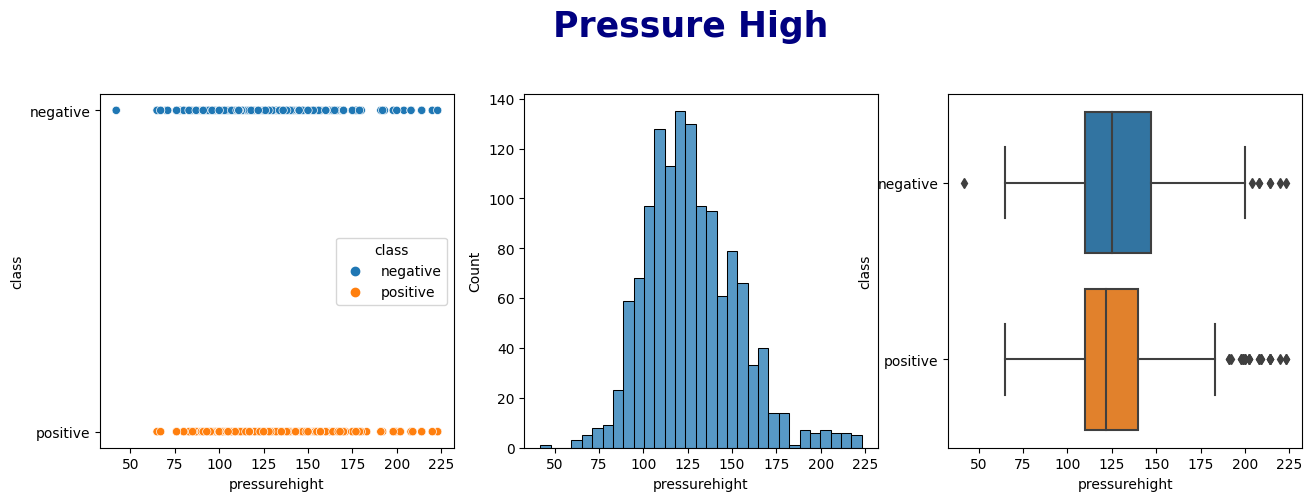

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Pressure High', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='pressurehight', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='pressurehight', ax=axes[1])

# ax3
sns.boxplot(data=df, x='pressurehight', y='class', ax=axes[2])

plt.show()


**LOW BP**

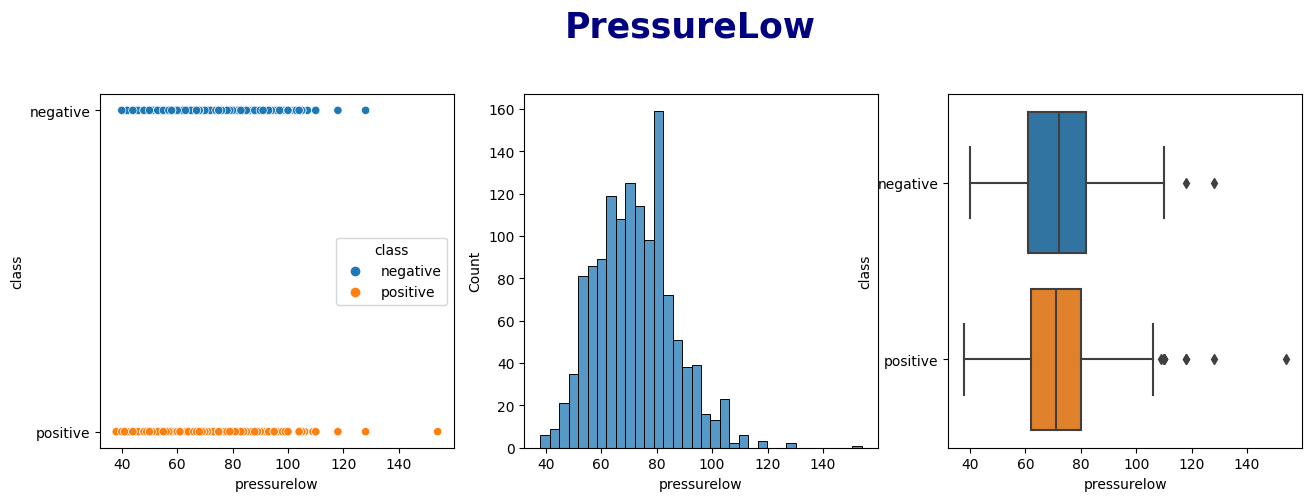

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('PressureLow', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='pressurelow', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='pressurelow', ax=axes[1])

# ax3
sns.boxplot(data=df, x='pressurelow', y='class')
plt.show()

**GULCOSE**

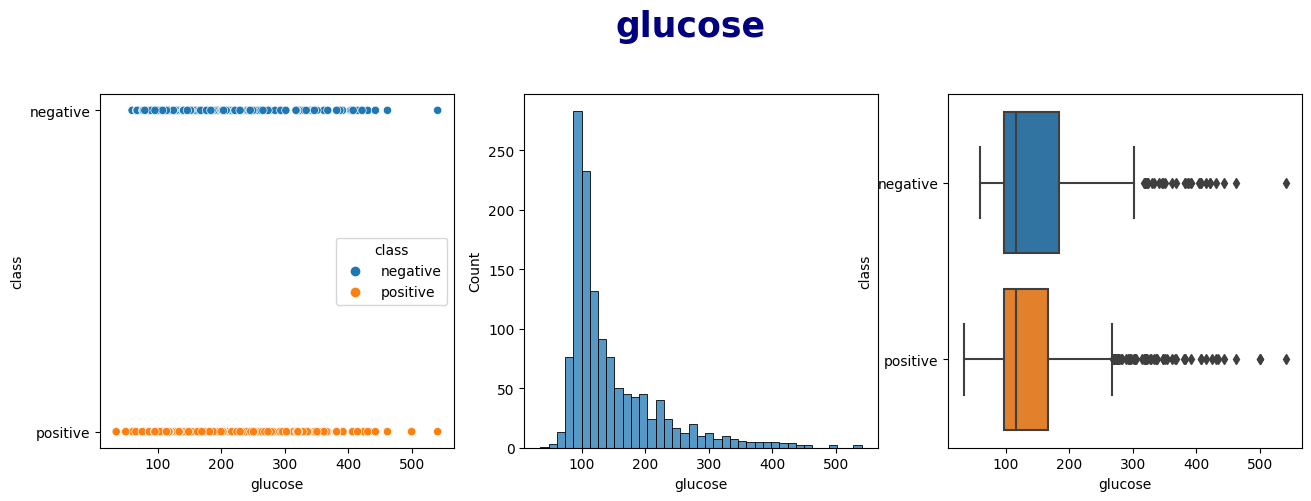

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('glucose', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='glucose', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='glucose', ax=axes[1])

# ax3
sns.boxplot(data=df, x='glucose', y='class')
plt.show()

**CK-MB**

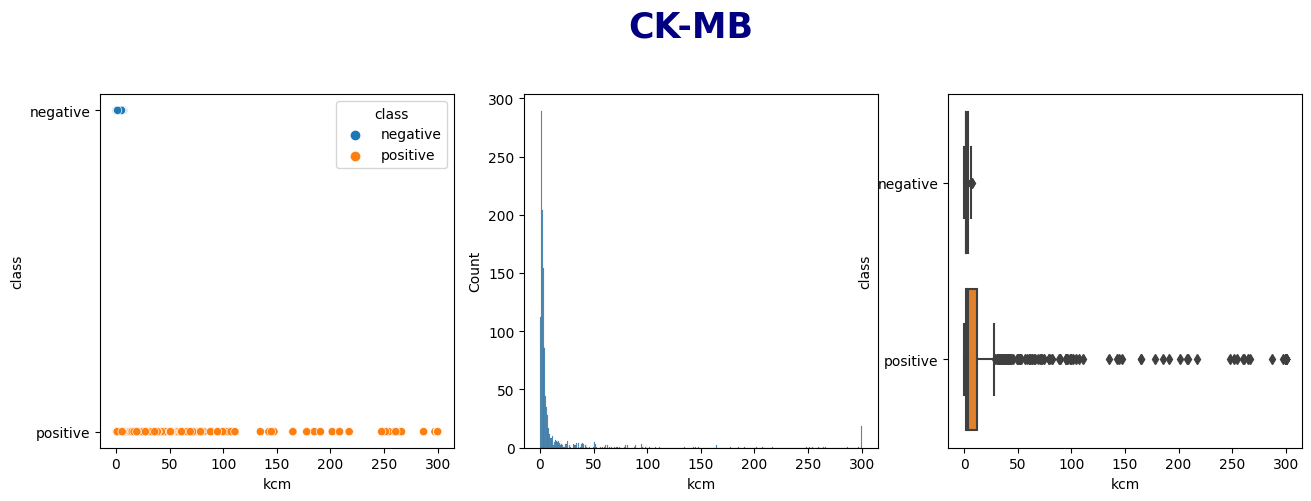

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('CK-MB', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=df, x='kcm', y='class')
plt.show()

**TROPONIN**

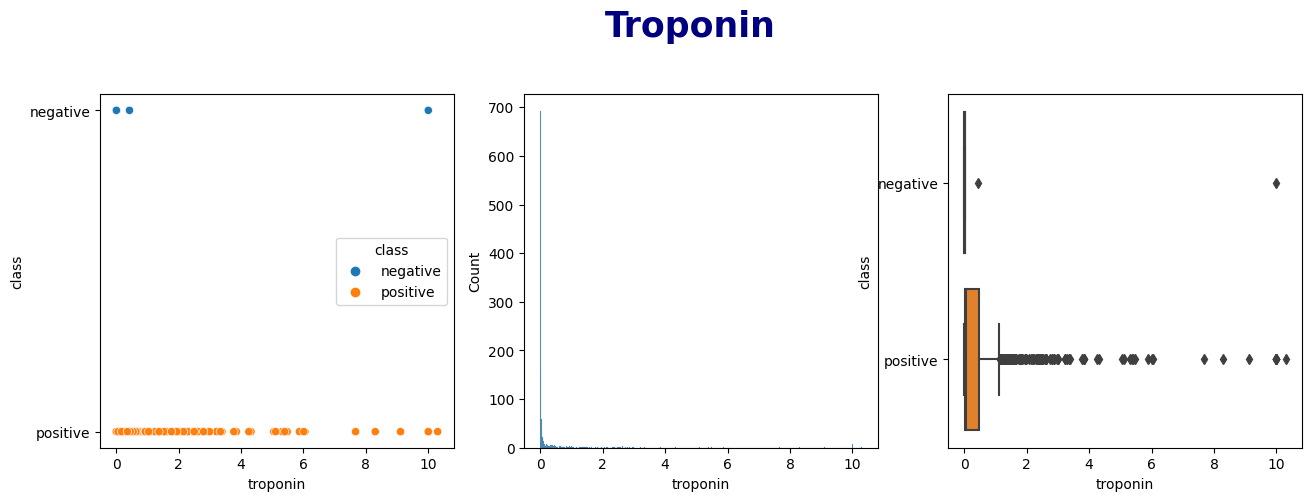

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=df, x='troponin', y='class')
plt.show()

In [ ]:
z_scores = stats.zscore(df[['troponin', 'kcm']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

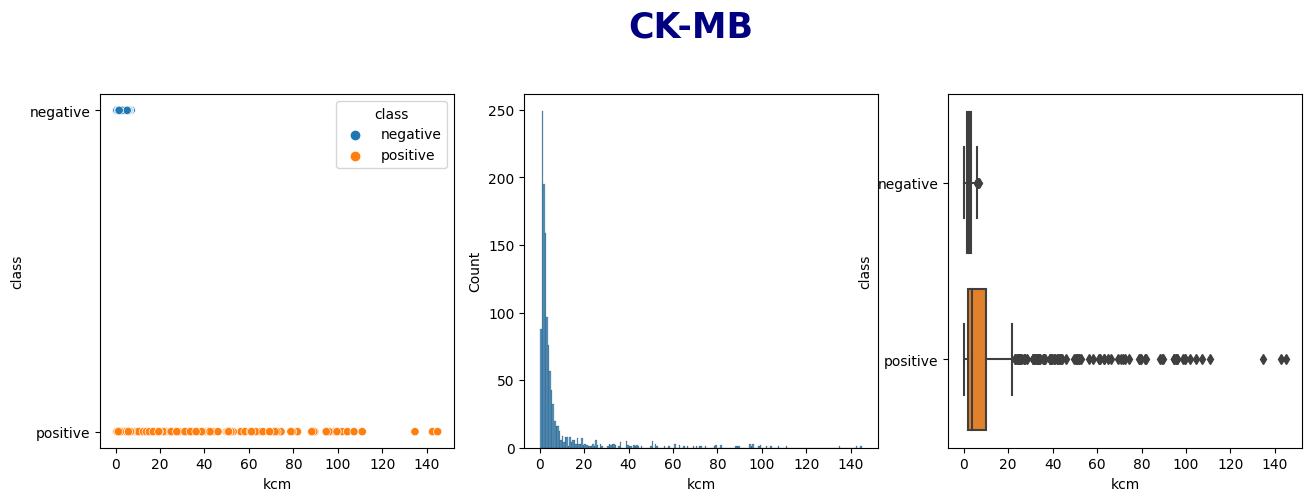

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('CK-MB', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=df, x='kcm', y='class')
plt.show()

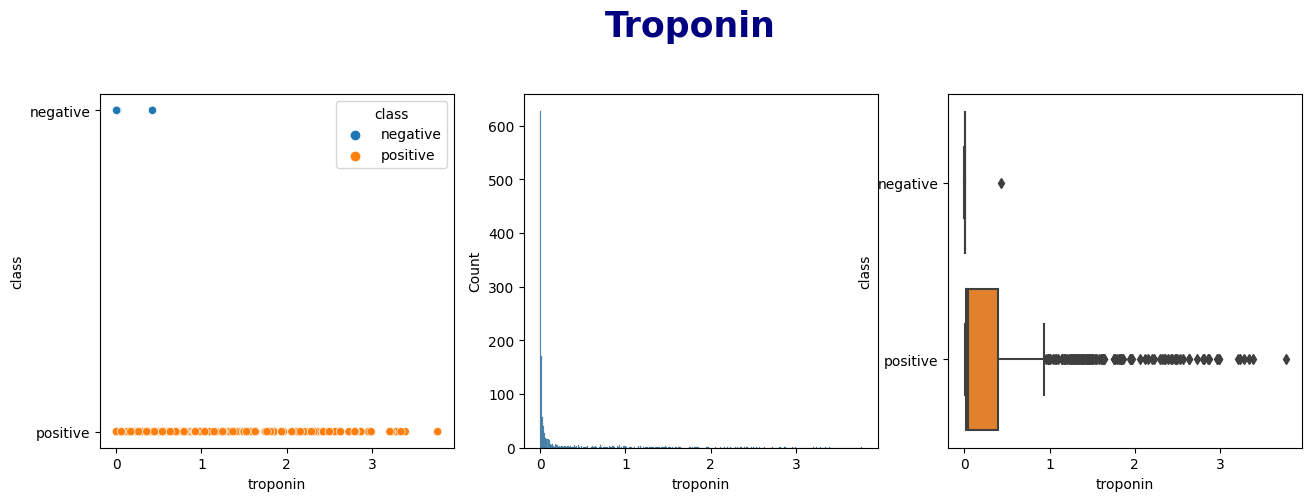

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=df, x='troponin', y='class')
plt.show()

**DATA PREPROCESSING**

**CONVERTING CLASS TO NUMERICS**

In [ ]:
# Converting class column to numerical data
df['class'] = df['class'].replace({'positive': 1, 'negative': 0})


**CORRELATION MATRIX**

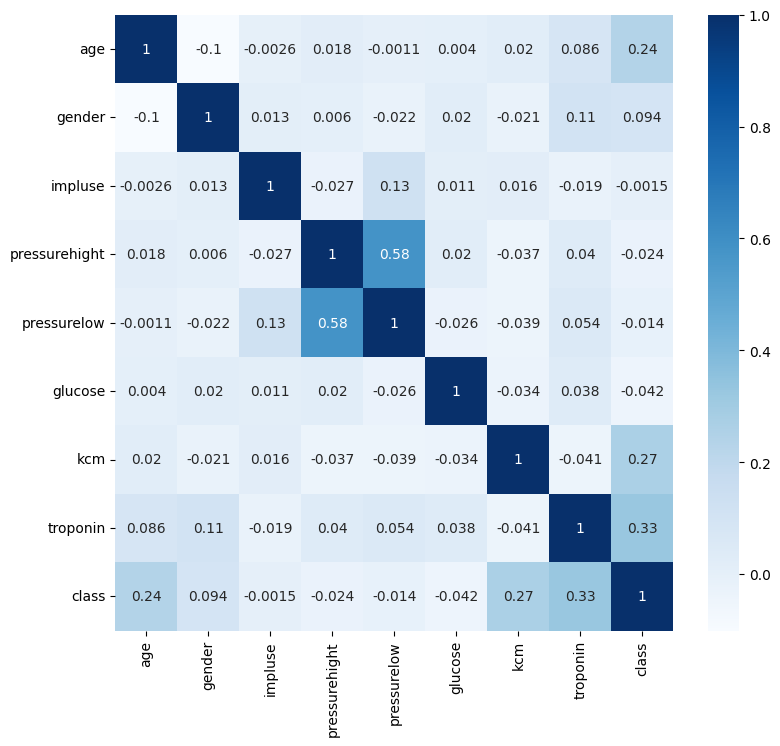

In [ ]:
# Create and plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(9, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

**CONCLUSION**

Age, the dataset spans ages from children to elderly people, and it can be noticed that people with heart diseases are on overage older than those without heart diseases.
Gender, the dataset consists mostly of males (66%), and males are more likely to suffer from heart diseases than females.
Impulse, the dataset consists mostly of people with normal impulse, and there doesn't seem to be any correlation between impulse and heart diseases.
Pressure High and Pressure Low, the data is normally distributed, and there doesn't seem to be an obvious correlation between pressure and heart diseases.
Glucose, the data is right skewed, and there's no high correlation between glucose and heart diseases.
CK-MB and Troponin, the data is right skewed, and there's an obvious correlation between both of them and heart diseases.
We will need to deal with the outliers in the CK-MB and Troponin columns
We will also apply log transformation to the Glucose, CK-MB and Troponin columns to make them more normally distributed

**DROPING COLUMNS**

In [ ]:
columns_to_drop = ['impluse', 'pressurehight', 'pressurelow', 'glucose']

# Drop the specified columns
data = df.drop(columns=columns_to_drop)

# Display the resulting DataFrame
data.head()

,age,gender,kcm,troponin,class
0,64,1,1.80,0.012,0
1,21,1,6.75,1.060,1
2,55,1,1.99,0.003,0
3,64,1,13.87,0.122,1
4,55,1,1.08,0.003,0


**SPLITING OF DATASET**

In [ ]:

# Split the data into X (input features) and Y (target variable)
X = data[['age', 'gender', 'kcm', 'troponin']]
Y = data['class']

# Perform the train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1002, 4)
X_test shape: (251, 4)
Y_train shape: (1002,)
Y_test shape: (251,)


**STANDARD SCALING**

In [ ]:

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X

array([[ 0.58302669,  0.72154769, -0.3710489 , -0.38668123],
       [-2.58072546,  0.72154769, -0.0760719 ,  1.53182128],
       [-0.07915399,  0.72154769, -0.35972655, -0.40315692],
       ...,
       [ 0.73017796,  0.72154769, -0.39905682, -0.09378009],
       [-0.15272962,  0.72154769, -0.13268365,  0.24854813],
       [-0.37345652,  0.72154769,  2.55428865,  2.83157011]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1002, 4), (251, 4), (1002,), (251,))

In [ ]:
INPUT_SHAPE = x_train.shape[1]
OUTPUT_SHAPE = 1
LR = 0.001
EPOCHS = 300
BATCH_SIZE = 16

**DATA MODELING USING ANN**

In [1]:
model = Sequential([
    Input(shape=(INPUT_SHAPE,)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(OUTPUT_SHAPE, activation='sigmoid')]
)

model.compile(loss=BinaryCrossentropy(), optimizer=Adam(
    learning_rate=LR), metrics=['accuracy'])


NameError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=30, verbose=0,
                              mode='min', restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=1000,
                    batch_size=BATCH_SIZE, validation_data=(x_test, y_test), callbacks=[earlyStopping], verbose=1, shuffle=True)

Epoch 1/1000
63/63 [==============================] - 0s 4ms/step - loss: 0.2243 - accuracy: 0.9212 - val_loss: 0.1464 - val_accuracy: 0.9482
Epoch 2/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9301 - val_loss: 0.1468 - val_accuracy: 0.9641
Epoch 3/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.1974 - accuracy: 0.9242 - val_loss: 0.1441 - val_accuracy: 0.9602
Epoch 4/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.2209 - accuracy: 0.9172 - val_loss: 0.1436 - val_accuracy: 0.9482
Epoch 5/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9172 - val_loss: 0.1408 - val_accuracy: 0.9602
Epoch 6/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.2053 - accuracy: 0.9281 - val_loss: 0.1423 - val_accuracy: 0.9641
Epoch 7/1000
63/63 [==============================] - 0s 3ms/step - loss: 0.2144 - accuracy: 0.9251 - val_loss: 0.1392 - val_accuracy: 0.9482
Epoch 

**MODEL EVALUATION**

In [ ]:
# Calculate the accuracy of the model on the test set
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9841


[0.05555085092782974, 0.9840637445449829]

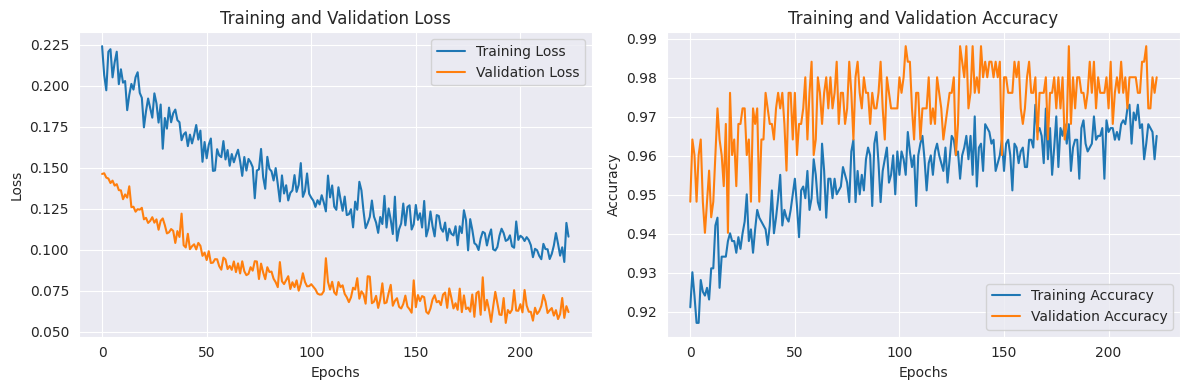

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Extract training and validation metrics from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create subplots for loss and accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot training and validation loss
ax1.plot(train_loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(train_accuracy, label='Training Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

plt.tight_layout()
plt.savefig('loss_accuracy.png', dpi=300)
plt.show()

8/8 [==============================] - 0s 2ms/step


<ipython-input-56-f2c16b09de1b>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', 'Negative', 'Positive'])
<ipython-input-56-f2c16b09de1b>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['', 'Negative', 'Positive'])


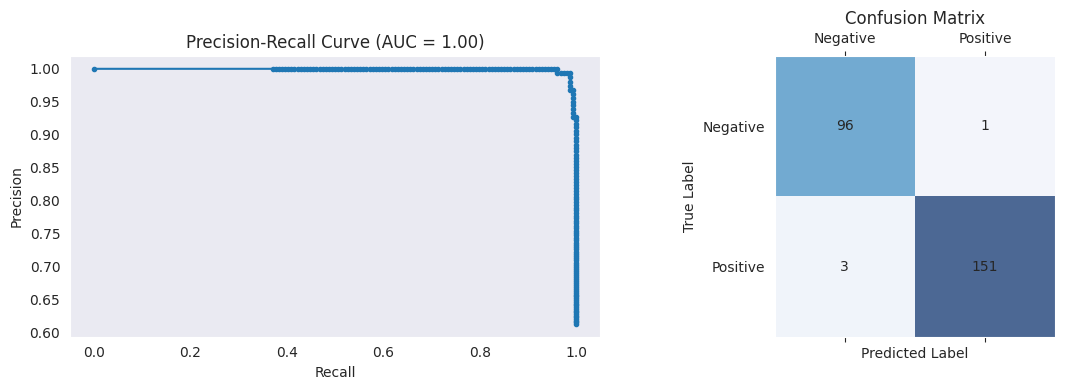

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98        97
     Class 1       0.99      0.98      0.99       154

    accuracy                           0.98       251
   macro avg       0.98      0.99      0.98       251
weighted avg       0.98      0.98      0.98       251

Precision at Best Threshold: 0.9935
Recall at Best Threshold: 0.9870
F1-Score at Best Threshold: 0.9902


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

sns.set_style('dark')

# Make predictions on the validation data
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_binary)

# Calculate precision and recall
precision = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Create a precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Calculate the area under the curve (AUC) for precision-recall
pr_auc = auc(recall, precision)

# Print classification report
class_report = classification_report(
    y_test, y_pred_binary, target_names=['Class 0', 'Class 1'])

# Create subplots for precision-recall curve and confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot precision-recall curve
ax1.plot(recall, precision, marker='.')
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title(f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

# Plot confusion matrix
ax2.matshow(confusion, cmap=plt.cm.Blues, alpha=0.7)
for i in range(2):
    for j in range(2):
        ax2.text(j, i, str(confusion[i, j]), va='center', ha='center')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')
ax2.set_xticklabels(['', 'Negative', 'Positive'])
ax2.set_yticklabels(['', 'Negative', 'Positive'])
ax2.set_title('Confusion Matrix')

plt.tight_layout()
plt.savefig('pr_curve_confusion_matrix.png', dpi=300)
plt.show()

# Print the classification report
print("Classification Report:")
print(class_report)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)
# Find the threshold that maximizes F1-score
best_f1_index = np.argmax(f1_score)

# Print precision, recall, and F1-score at the threshold that maximizes F1-score
print(f"Precision at Best Threshold: {precision[best_f1_index]:.4f}")
print(f"Recall at Best Threshold: {recall[best_f1_index]:.4f}")
print(f"F1-Score at Best Threshold: {f1_score[best_f1_index]:.4f}")

**MODEL SAVING**

In [ ]:
model.save('/content/capstone trained model')

**PREDICTION ON UNSEEN DATA**

In [ ]:
data.head()

,age,gender,kcm,troponin,class
0,64,1,1.80,0.012,0
1,21,1,6.75,1.060,1
2,55,1,1.99,0.003,0
3,64,1,13.87,0.122,1
4,55,1,1.08,0.003,0


In [ ]:
model.predict([[54,1,13.87,0.122]])

1/1 [==============================] - 0s 38ms/step


array([[1.]], dtype=float32)